# NEMA RECOHITS

- Builds the recohits function for the NEMA analysis 

In [1]:
import Pkg

In [482]:
Pkg.add.(["HTTP", "Plots", "DataFrames", "HDF5","DrWatson", "StatsBase"]);

In [504]:
Pkg.add.(["Test"]);

In [48]:
Pkg.add.(["VegaLite","VegaDatasets"]);

In [129]:
Pkg.add.(["LsqFit","GLM"])

2-element Vector{Nothing}:
 nothing
 nothing

In [1]:
using LsqFit
using GLM

In [2]:
using HTTP
using Plots
using VegaLite
using VegaDatasets
using DataFrames
using HDF5
using DrWatson
using Test

In [3]:
using Glob
using CSV

In [4]:
using Statistics
using StatsBase
using Printf

In [5]:
using Maybe

In [6]:
@quickactivate "JPetalo"

In [7]:
pwd()

"/Users/jj/JuliaProjects/JPetalo/notebooks"

In [8]:
datadir()

"/Users/jj/JuliaProjects/JPetalo/data"

In [9]:
srcdir()

"/Users/jj/JuliaProjects/JPetalo/src"

In [10]:
include(srcdir("jpetalo.jl"))

Main.JPetalo

## Read a file with petalo interactions

In [11]:
path = datadir("nema3-vac-1m/nema3-vac-1m-0.h5")

"/Users/jj/JuliaProjects/JPetalo/data/nema3-vac-1m/nema3-vac-1m-0.h5"

In [12]:
fid = h5open(path, "r") 

🗂️ HDF5.File: (read-only) /Users/jj/JuliaProjects/JPetalo/data/nema3-vac-1m/nema3-vac-1m-0.h5
└─ 📂 MC
   ├─ 🔢 configuration
   ├─ 🔢 hits
   ├─ 🔢 primaries
   ├─ 🔢 process_names
   ├─ 🔢 sensor_xyz
   ├─ 🔢 total_charge
   ├─ 🔢 vertices
   ├─ 🔢 volume_names
   └─ 🔢 waveform

In [34]:
pdf = JPetalo.read_abc(path);

In [35]:
println(names(pdf.total_charge))

["event_id", "sensor_id", "charge"]


In [40]:
prim = JPetalo.select_by_column_value(pdf.primaries, "event_id", 0)

,event_id,x,y,z,vx,vy,vz
,Int64,Float32,Float32,Float32,Float32,Float32,Float32
1,0,0.0,100.0,100.0,0.409795,0.296134,-0.0741218


In [41]:
sxyz = pdf.sensor_xyz;
first(sxyz,5)

,sensor_id,x,y,z
,Int64,Float32,Float32,Float32
1,0,0.0,395.4,-493.5
2,1,0.0,395.4,-486.5
3,2,0.0,395.4,-479.5
4,3,0.0,395.4,-472.5
5,4,0.0,395.4,-465.5


In [42]:
sqrt(sxyz[1,"x"]^2 + sxyz[1,"y"]^2)

395.4f0

In [43]:
first(pdf.waveform,5)

,event_id,sensor_id,time
,Int64,Int64,Float32
1,0,8,271.643
2,0,10,27.0399
3,0,37,63.5379
4,0,39,49.9229
5,0,41,37.0302


In [49]:
nrow(pdf.waveform)

33030191

In [51]:
t1 = pdf.waveform;

In [54]:
nrow(t1)

33030191

In [52]:
t2 = pdf.waveform;

In [57]:
tt = vcat([t1, t2]...);

In [61]:
@time groupby(t1, :sensor_id);

  0.068023 seconds (190 allocations: 252.395 MiB, 31.94% gc time)


In [63]:
@time groupby(tt, :sensor_id);

  0.123446 seconds (191 allocations: 504.396 MiB, 15.83% gc time)


In [64]:
groupby(tt, :sensor_id)

,event_id,sensor_id,time
,Int64,Int64,Float32
1,69,0,9.17279
2,69,0,23.3175
3,139,0,10.424
4,139,0,109.041
5,139,0,110.667
6,139,0,126.44
7,169,0,155.715
8,268,0,41.0219
9,322,0,5.18362


In [44]:
dfs = JPetalo.primary_in_lxe(pdf.vertices)       # primary photons in LXe
first(dfs,5)

,event_id,track_id,parent_id,x,y,z,t,moved,pre_KE
,Int64,Int64,Int64,Float32,Float32,Float32,Float32,Float32,Float32
1,0,2,0,-329.725,-138.272,159.639,1.37147,1.60207,511.0
2,0,2,0,-341.491,-146.734,161.665,1.42028,14.6337,511.0
3,0,2,0,-328.042,-151.718,150.513,1.48088,18.1678,202.182
4,0,1,0,260.333,288.127,52.9122,1.08284,33.4672,511.0
5,0,1,0,263.184,286.08,57.9332,1.10327,6.12604,260.213


In [45]:
event=0
ecut = 2.0
pde =0.3

0.3

In [654]:
wfm = JPetalo.select_by_column_value(pdf.waveform, "event_id", event)
wfm[!, "q"] = Float32.(ones(nrow(wfm)))
wfm[!, "prob"] = rand(Float32, nrow(wfm))
println("size of wfm =", size(wfm))
first(wfm, 5)

size of wfm =(12727, 5)


,event_id,sensor_id,time,q,prob
,Int64,Int64,Float32,Float32,Float32
1,0,8,271.643,1.0,0.823898
2,0,10,27.0399,1.0,0.944809
3,0,37,63.5379,1.0,0.0523998
4,0,39,49.9229,1.0,0.313157
5,0,41,37.0302,1.0,0.556538


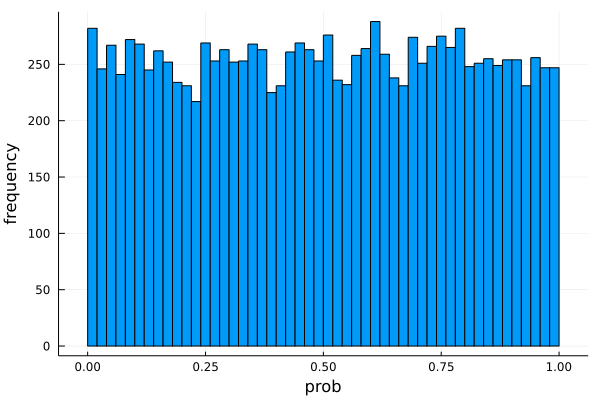

In [655]:
hprob = JPetalo.hist1d(wfm.prob, 50, 0., 1.);
plot(hprob, xlabel= "prob", ylabel="frequency", legend=false)

In [657]:
sum(wfm.q)

12727.0f0

In [33]:
wfmc = JPetalo.select_by_column_value_lt(wfm, "prob", pde)
#wfmc = wfm
println("size of wfmc =", size(wfmc))
first(wfmc, 5)

LoadError: UndefVarError: wfm not defined

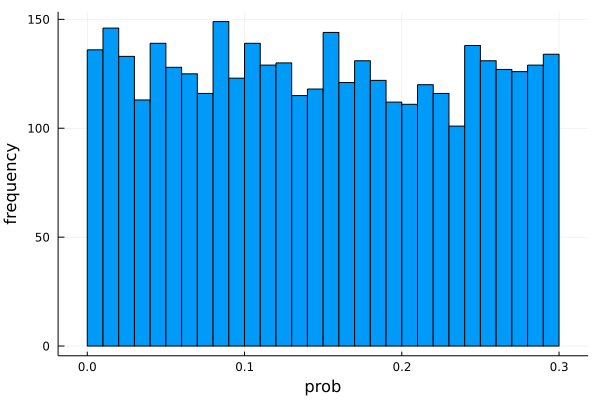

In [659]:
hprob2 = JPetalo.hist1d(wfmc.prob, 50, 0., 1.);
plot(hprob2, xlabel= "prob", ylabel="frequency", legend=false)

In [661]:
sum(wfmc.q)

3802.0f0

In [662]:
d = Normal(0.0, 0.085)

Normal{Float64}(μ=0.0, σ=0.085)

In [663]:
wfmc[!,"dt"] = Float32.(rand(d, nrow(wfmc)))
println("size of wfmc =", size(wfmc))
first(wfmc, 5)

size of wfmc =(3802, 6)


,event_id,sensor_id,time,q,prob,dt
,Int64,Int64,Float32,Float32,Float32,Float32
1,0,37,63.5379,1.0,0.0523998,-0.0813791
2,0,66,34.9161,1.0,0.0262038,0.00504709
3,0,69,76.071,1.0,0.166807,0.0374141
4,0,84,7.34761,1.0,0.128407,-0.157854
5,0,92,16.5504,1.0,0.0446063,0.0139807


In [664]:
wfmt = transform(wfmc, [:time, :dt] => (+) => :mtime)
println("size of wfmt =", size(wfmt))
first(wfmt, 5)

size of wfmt =(3802, 7)


,event_id,sensor_id,time,q,prob,dt,mtime
,Int64,Int64,Float32,Float32,Float32,Float32,Float32
1,0,37,63.5379,1.0,0.0523998,-0.0813791,63.4565
2,0,66,34.9161,1.0,0.0262038,0.00504709,34.9212
3,0,69,76.071,1.0,0.166807,0.0374141,76.1084
4,0,84,7.34761,1.0,0.128407,-0.157854,7.18975
5,0,92,16.5504,1.0,0.0446063,0.0139807,16.5644


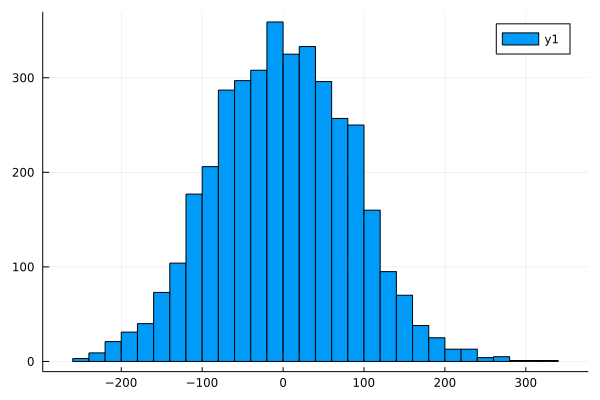

In [808]:
histogram(1000.0(wfmt.mtime- wfmt.time))

In [810]:
JPetalo.mean_std((wfmt.mtime- wfmt.time), -200.0f0, 200.0f0)

(-0.00019916614f0, 0.08426904f0)

In [665]:
wtm1 = combine(groupby(wfmt, :sensor_id), :time => minimum)
println("size of wtm1 =", size(wtm1))
first(wtm1, 5)

size of wtm1 =(2533, 2)


,sensor_id,time_minimum
,Int64,Float32
1,37,63.5379
2,66,34.9161
3,69,76.071
4,84,7.34761
5,92,16.5504


In [666]:
wtmm1 = combine(groupby(wfmt, :sensor_id), :mtime => minimum)
println("size of wtmm1 =", size(wtmm1))
first(wtmm1, 5)

size of wtmm1 =(2533, 2)


,sensor_id,mtime_minimum
,Int64,Float32
1,37,63.4565
2,66,34.9212
3,69,76.1084
4,84,7.18975
5,92,16.5644


In [722]:
wtmq = combine(groupby(wfmt, :sensor_id), :q => sum)
println("size of wtm1 =", size(wtmq))
first(wtmq, 5)

size of wtm1 =(2533, 2)


,sensor_id,q_sum
,Int64,Float32
1,37,1.0
2,66,1.0
3,69,1.0
4,84,1.0
5,92,1.0


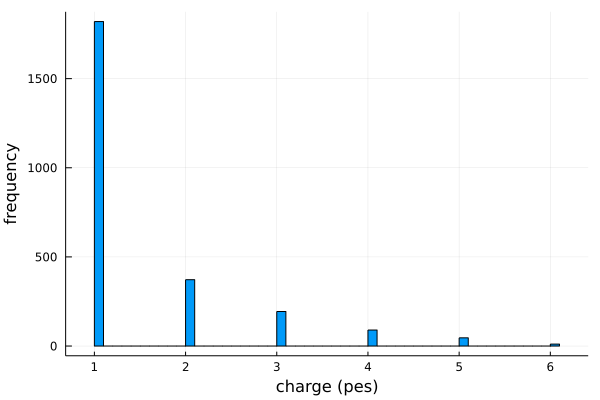

In [723]:
hqsum = JPetalo.hist1d(wtmq.q_sum, 50, 0., 10.);
plot(hqsum, xlabel= "charge (pes)", ylabel="frequency", legend=false)

In [724]:
sum(wtmq.q_sum)

3802.0f0

In [725]:
qdf = JPetalo.select_by_column_value(pdf.total_charge, "event_id", event)
println("size of qdf =", size(qdf))
first(qdf, 5)

size of qdf =(5762, 3)


,event_id,sensor_id,charge
,Int64,Int64,Int64
1,0,8,1
2,0,10,1
3,0,37,1
4,0,39,1
5,0,41,1


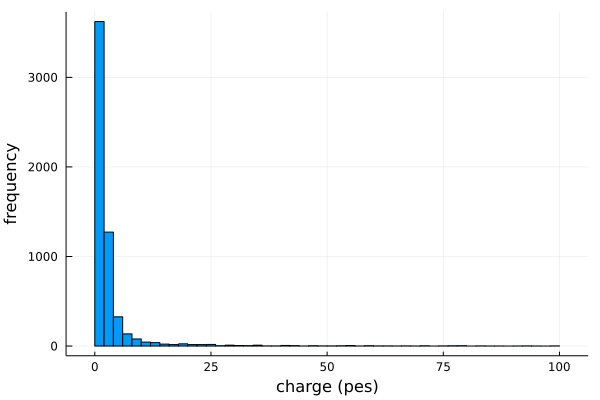

In [726]:
hc = JPetalo.hist1d(qdf.charge, 50, 0, 100);
plot(hc, xlabel= "charge (pes)", ylabel="frequency", legend=false)

In [727]:
sum(qdf.charge) 

25447

In [728]:
qdfge10 = JPetalo.select_by_column_value_gt(qdf, "charge", 10)
println("size of dataframe =", size(qdfge10))
first(qdfge10, 5)

size of dataframe =(306, 3)


,event_id,sensor_id,charge
,Int64,Int64,Int64
1,0,14577,12
2,0,14721,11
3,0,14860,11
4,0,14862,12
5,0,14863,12


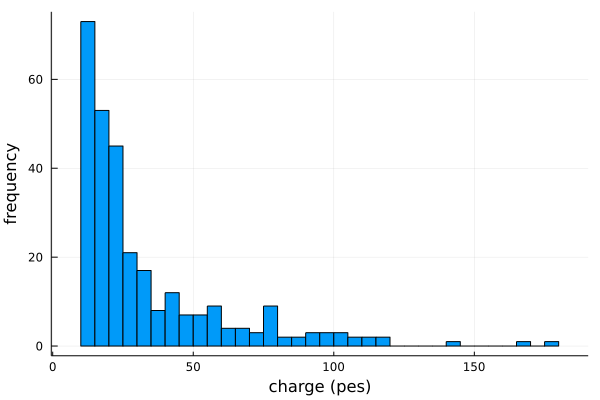

In [729]:
hc = JPetalo.hist1d(qdfge10.charge, 50, 0, 200);
plot(hc, xlabel= "charge (pes)", ylabel="frequency", legend=false)

In [730]:
qq = qdfge10.charge * 0.3;

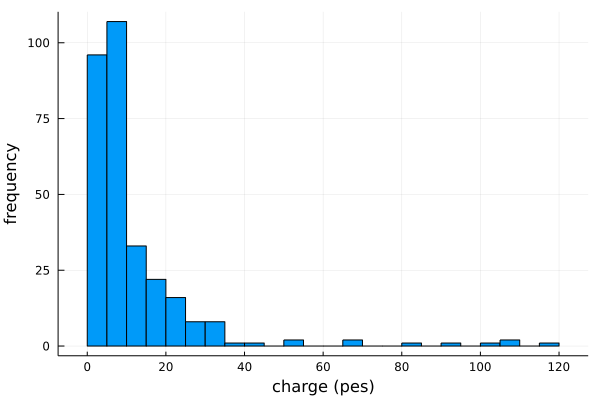

In [731]:
hc = JPetalo.hist1d(qq, 50, 0., 200.);
plot(hc, xlabel= "charge (pes)", ylabel="frequency", legend=false)

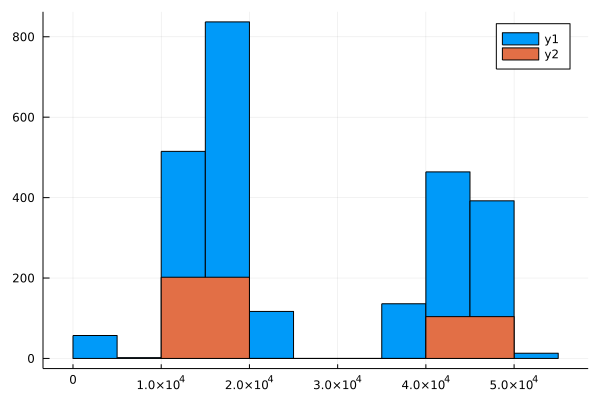

In [732]:
h1 = histogram(wtmq.sensor_id)
h2 = histogram!(h1, qdfge10.sensor_id)

In [733]:
sum(qdfge10.charge) 

15780

In [734]:
sum(qdf.charge) - sum(qdfge10.charge) 

9667

In [735]:
nrow(qdfge10)

306

In [736]:
println(qdfge10.sensor_id)

[14577, 14721, 14860, 14862, 14863, 14994, 14996, 15000, 15001, 15002, 15004, 15005, 15006, 15007, 15009, 15141, 15142, 15143, 15144, 15145, 15146, 15147, 15148, 15149, 15150, 15281, 15282, 15283, 15284, 15285, 15286, 15287, 15288, 15289, 15290, 15291, 15292, 15293, 15423, 15424, 15425, 15426, 15427, 15428, 15429, 15430, 15431, 15432, 15433, 15434, 15565, 15566, 15567, 15568, 15569, 15570, 15571, 15572, 15573, 15574, 15575, 15576, 15577, 15705, 15707, 15708, 15709, 15710, 15711, 15712, 15713, 15714, 15715, 15716, 15717, 15718, 15719, 15720, 15848, 15849, 15850, 15851, 15852, 15853, 15854, 15855, 15856, 15857, 15858, 15859, 15860, 15861, 15862, 15863, 15991, 15992, 15993, 15994, 15995, 15996, 15997, 15998, 15999, 16000, 16001, 16002, 16003, 16004, 16132, 16133, 16134, 16135, 16136, 16137, 16138, 16139, 16140, 16141, 16142, 16143, 16144, 16145, 16146, 16273, 16274, 16275, 16276, 16277, 16278, 16279, 16280, 16281, 16282, 16283, 16284, 16285, 16286, 16287, 16416, 16417, 16418, 16419, 16420

In [737]:
println(qdfge10.charge)

[12, 11, 11, 12, 12, 11, 11, 16, 12, 22, 16, 20, 13, 15, 11, 15, 16, 20, 23, 22, 19, 22, 19, 15, 12, 13, 11, 13, 21, 23, 28, 24, 29, 25, 23, 21, 12, 13, 12, 21, 18, 23, 35, 47, 47, 52, 40, 31, 22, 19, 16, 16, 24, 31, 37, 43, 79, 71, 65, 41, 40, 24, 14, 11, 19, 24, 39, 42, 63, 71, 92, 83, 60, 47, 43, 35, 12, 13, 12, 12, 21, 34, 55, 76, 105, 111, 113, 98, 48, 35, 26, 25, 14, 19, 16, 22, 30, 51, 71, 91, 109, 117, 77, 55, 43, 28, 25, 11, 11, 19, 21, 38, 54, 68, 85, 99, 87, 58, 58, 31, 24, 20, 17, 15, 15, 19, 22, 32, 46, 56, 50, 76, 63, 54, 41, 33, 22, 23, 11, 18, 14, 34, 41, 41, 55, 52, 58, 45, 24, 24, 21, 15, 13, 19, 19, 27, 25, 42, 35, 22, 24, 17, 19, 11, 18, 19, 23, 24, 33, 34, 24, 21, 18, 19, 14, 14, 25, 17, 19, 26, 17, 23, 22, 12, 15, 14, 15, 15, 12, 20, 12, 13, 13, 14, 11, 11, 11, 11, 16, 12, 12, 11, 11, 11, 13, 15, 13, 18, 13, 15, 21, 16, 12, 11, 12, 11, 14, 18, 28, 59, 34, 30, 31, 19, 19, 18, 29, 66, 103, 101, 75, 40, 20, 11, 18, 28, 67, 167, 352, 385, 176, 75, 29, 12, 21, 37, 103,

In [711]:
j=1
for i in 1:nrow(wtmq)
    if j == nrow(qdfge10)
        break
    end
    
    if wtmq[i, "sensor_id"] ∈ qdfge10.sensor_id
        nomatch=true
        #println("wtmq row=", i, " qdf row =",j)
        #println("sensor_id in wtmq=", wtmq[i, "sensor_id"], " charge =", wtmq[i, "q_sum"])
        #println("sensor_id in qdf=", qdfge10[j, "sensor_id"], " charge = ", qdfge10[j, "charge"])
        
        while nomatch 
            if wtmq[i, "sensor_id"] == qdfge10[j, "sensor_id"]
                #println("wtmq sensor_id = ", wtmq[i, "sensor_id"], " qtmq q = ", wtmq[i, "q_sum"])
                #println("qdfge10 sensor_id = ", qdfge10[j, "sensor_id"], " qdfge10 q = ", qdfge10[j, "charge"])
                wtmq[i, "q_sum"] = qdfge10[j, "charge"] * pde 
                #println("i =", i, " wtmq (after corr) =", wtmq[i, "q_sum"]) 
                j+=1
                nomatch=false
            else
                j+=1
                if j == nrow(qdfge10)
                    break
                end
            end
        end     
    end
end
    

In [721]:
function sync!(wfm, qdf)
    j=1
    for i in 1:nrow(wfm)
        if wfm[i, "sensor_id"] ∈ qdf.sensor_id
            nomatch=true
            while nomatch && j <= nrow(qdf)
                if wfm[i, "sensor_id"] == qdf[j, "sensor_id"]
                    #println("wtmq sensor_id = ", wtmq[i, "sensor_id"], " qtmq q = ", wtmq[i, "q_sum"])
                    #println("qdfge10 sensor_id = ", qdfge10[j, "sensor_id"], " qdfge10 q = ", qdfge10[j, "charge"])
                    wfm[i, "q_sum"] = qdf[j, "charge"] * pde 
                    j+=1
                    nomatch=false
                else
                    j+=1
                end
            end     
        end
    end
end



sync! (generic function with 1 method)

In [738]:
sync!(wtmq, qdfge10)

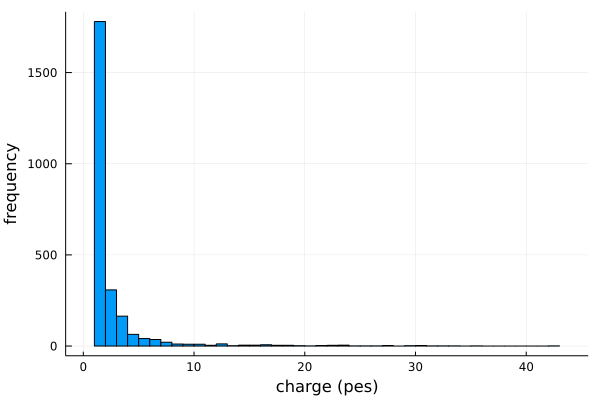

In [739]:
hqsum = JPetalo.hist1d(wtmq.q_sum, 50, 0., 50.);
plot(hqsum, xlabel= "charge (pes)", ylabel="frequency", legend=false)

In [740]:
wfmx  = DataFrame(sensor_id=wtmq.sensor_id, 
                  ttmin=wtm1.time_minimum, 
                  tmin=wtmm1.mtime_minimum,
                  q=wtmq.q_sum)

println("size of wfmx =", size(wfmx))
first(wfmx, 5)

size of wfmx =(2533, 4)


,sensor_id,ttmin,tmin,q
,Int64,Float32,Float32,Float32
1,37,63.5379,63.4565,1.0
2,66,34.9161,34.9212,1.0
3,69,76.071,76.1084,1.0
4,84,7.34761,7.18975,1.0
5,92,16.5504,16.5644,1.0


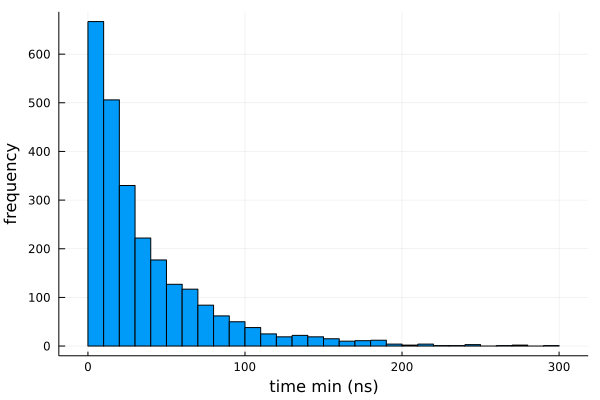

In [741]:
hq = JPetalo.hist1d(wfmx.ttmin, 50, 0., 300.)
plot(hq, legend=false, xlabel="time min (ns)", ylabel="frequency")

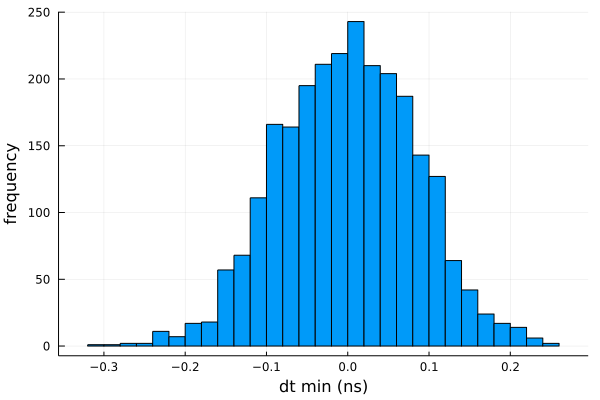

In [742]:
hq = JPetalo.hist1d(wfmx.ttmin - wfmx.tmin, 50, -100., 100.)
plot(hq, legend=false)
xlabel!("dt min (ns)")
ylabel!("frequency")

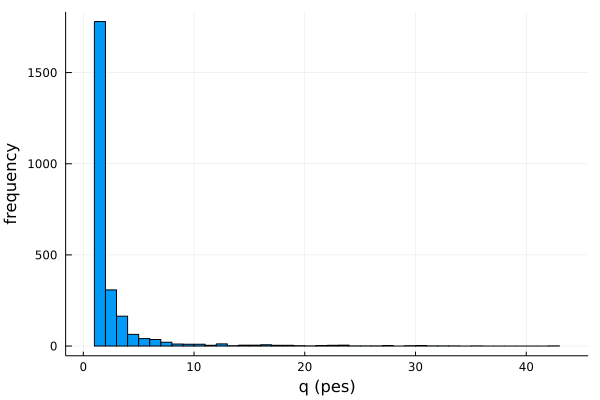

In [743]:
hq =JPetalo.hist1d(wfmx.q, 50, 0., 50.);
plot(hq, legend=false)
xlabel!("q (pes)")
ylabel!("frequency")

In [744]:
wfmqt   = wfmx[wfmx.q .>ecut,:]
println("size of wfmqt =", size(wfmqt))
first(wfmqt, 5)

size of wfmqt =(445, 4)


,sensor_id,ttmin,tmin,q
,Int64,Float32,Float32,Float32
1,215,6.48515,6.58145,3.0
2,12595,10.2566,10.2692,3.0
3,13142,4.76086,4.82058,4.0
4,13572,55.6482,55.5748,3.0
5,14284,14.4393,14.3981,3.0


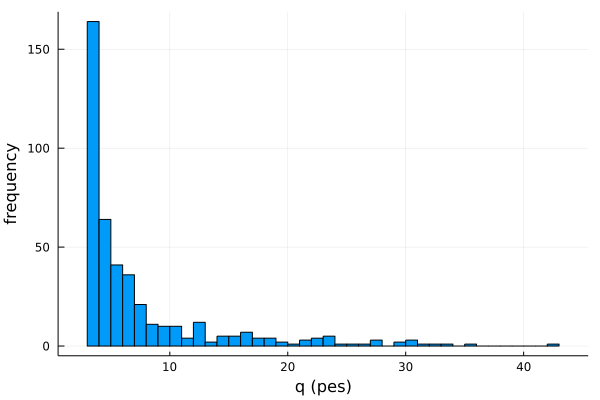

In [745]:
hq =JPetalo.hist1d(wfmqt.q, 50, 0., 50.);
plot(hq, legend=false)
xlabel!("q (pes)")
ylabel!("frequency")

In [720]:
#select the id's of the sipms with charge above threshold
sids = wfmqt[!,:sensor_id]

#compute positions of the SiPMs
pos   = JPetalo.sipm_pos.((pdf.sensor_xyz,),sids)
x = [p[1] for p in pos]
y = [p[2] for p in pos]
z = [p[3] for p in pos]

# return hit data frame
xyzqtdf = DataFrame(x=x,y=y,z=z,
                    ttmin=wfmqt.ttmin, 
                    tmin=wfmqt.tmin,
                    q=wfmqt.q) 
println("size of xyzqtdf =", size(xyzqtdf))
first(xyzqtdf, 5)

size of xyzqtdf =(444, 6)


,x,y,z,ttmin,tmin,q
,Float32,Float32,Float32,Float32,Float32,Float32
1,-7.01763,395.338,17.5,6.48515,6.58145,3.0
2,-395.384,3.50895,199.5,10.2566,10.2692,3.0
3,-394.637,-24.5472,52.5,4.76086,4.82058,4.0
4,-392.772,-45.5159,80.5,55.6482,55.5748,3.0
5,-387.192,-80.1477,94.5,14.4393,14.3981,3.0


In [769]:
function reco_hits(event::Integer, 
                   total_charge::DataFrame,
                   sensor_xyz::DataFrame, 
                   waveform::DataFrame, 
                   ecut::Number=2.0, 
                   pde::Number=0.3,  
                   sigma_tof::Number=0.085, 
                   verbose::Bool=true)
    
    max_pes =10

    function sync!(wfm, qdf)
        j=1
        for i in 1:nrow(wfm)
            if wfm[i, "sensor_id"] ∈ qdf.sensor_id
                nomatch=true
                while nomatch && j <= nrow(qdf)
                    if wfm[i, "sensor_id"] == qdf[j, "sensor_id"]
                        #println("wtmq sensor_id = ", wtmq[i, "sensor_id"], " qtmq q = ", wtmq[i, "q_sum"])
                        #println("qdfge10 sensor_id = ", qdfge10[j, "sensor_id"], " qdfge10 q = ", qdfge10[j, "charge"])
                        wfm[i, "q_sum"] = qdf[j, "charge"] * pde 
                        j+=1
                        nomatch=false
                    else
                        j+=1
                    end
                end     
            end
        end
    end
    

    # select the waveform of this event
    wfm = JPetalo.select_by_column_value(waveform, "event_id", event)
    
    # add a column with probability of surviving pdf cut (pass if prob < pde)
    wfm[!, "prob"] = rand(Float32, nrow(wfm))
    
    # add a column of charge (each photon arriving to the SiPm in the waveform has charge of one)
    wfm[!, "q"] =ones(nrow(wfm))
    
    if verbose
        println("event =", event)
        println("waveform DF: size =", size(wfm))
        first(wfm, 5)
    end

    # SiPM pass PDE cut if prob < PDE
    wfmc = JPetalo.select_by_column_value_lt(wfm, "prob", pde)
       
    # add a column of gaussian random numbers representing the smearing of electronics and sensor
    d = Normal(0.0, sigma_tof)
    wfmc[!,"dt"] = rand(d, nrow(wfmc))
     
    # add column of smeared times to true times
    wfmt = transform(wfmc, [:time, :dt] => (+) => :mtime)
    
    if verbose
        println("waveform after prob cut =", size(wfmt))
        first(wfmt, 5)
    end
    
    # group by SiPMs and take minimum time 
    wtmin = combine(groupby(wfmt, :sensor_id), :time => minimum)
    
    if verbose
        println("waveform after grouping SiPMs and min time: size =", size(wtmin))
        first(wtmin, 5)
    end
    
    # group by SiPMs and take minimum time 
    wrtmin = combine(groupby(wfmt, :sensor_id), :mtime => minimum)
    
    if verbose
        println("waveform after grouping SiPMs and min reco time: size =", size(wrtmin))
        first(wrtmin, 5)
    end


    # group by SiPMs and compute the sum of the charge in the SiPMs
    wtmq = combine(groupby(wfmt, :sensor_id), :q => sum)
    
    if verbose
        println("waveform after grouping SiPMs and sum charge: size =", size(wtmq))
        first(wtmq, 5)
    end
    
    #select the dataframe of total charge for this event
    qdf = JPetalo.select_by_column_value(total_charge, "event_id", event)
    
    if verbose
        println("total charge DF: size =", size(qdf))
        first(qdf, 5)
    end
    
    # find SiPMs which have more than 10 pes
    qdf10 = JPetalo.select_by_column_value_gt(qdf, "charge", max_pes)
    
    if verbose
        println("select sipms such that q > 10 pes: size =", size(qdf10))
        first(qdf10, 5)
    end
    
   
    #sync the DataFrames: copy to wtmq SiPMs with charge > 10
    
    sync!(wtmq, qdf10)
    
    if verbose
        println("data frame after sync: size =", size(wtmq))
        first(wtmq, 5)
    end

   
    wfmx  = DataFrame(sensor_id=wtmq.sensor_id, 
                     tmin=wtmin.time_minimum, 
                     trmin=wrtmin.mtime_minimum,
                     q=wtmq.q_sum)

    if verbose
        println("DF with time and q =", size(wfmx))
        first(wfmx, 5)  
    end
      
    # cut on total charge (> ecut)
    qdft   = wfmx[wfmx.q .>ecut,:]
    
     #select the id's of the sipms with charge above threshold
    sids = qdft[!,:sensor_id]

    #compute positions of the SiPMs
    pos   = JPetalo.sipm_pos.((sensor_xyz,),sids)
    x = [p[1] for p in pos]
    y = [p[2] for p in pos]
    z = [p[3] for p in pos]

    # return hit data frame
    xyzqt   = DataFrame(x=x,y=y,z=z,
                        tmin=qdft.tmin,
                        trmin=qdft.trmin,           
                        q=qdft.q) 

    if verbose
        println("Final DF (xyzqt): size =", size(xyzqt))
        first(xyzqt, 5)  
    end

    
    return xyzqt
end

reco_hits (generic function with 7 methods)

In [770]:
sigma_tof=0.085

0.085

In [788]:
hitdf = @time reco_hits(event, 
                pdf.total_charge,
                pdf.sensor_xyz, 
                pdf.waveform, 
                ecut, 
                1.0, 
                0.001,
                true);

event =0
waveform DF: size =(12727, 5)
waveform after prob cut =(12727, 7)
waveform after grouping SiPMs and min time: size =(5762, 2)
waveform after grouping SiPMs and min reco time: size =(5762, 2)
waveform after grouping SiPMs and sum charge: size =(5762, 2)
total charge DF: size =(5762, 3)
select sipms such that q > 10 pes: size =(306, 3)
data frame after sync: size =(5762, 2)
DF with time and q =(5762, 4)
Final DF (xyzqt): size =(1206, 6)
  0.649162 seconds (62.27 k allocations: 23.880 MiB)


In [789]:
first(hitdf, 5)

,x,y,z,tmin,trmin,q
,Float32,Float32,Float32,Float32,Float64,Float64
1,-7.01763,395.338,17.5,6.48515,6.48564,3.0
2,-14.033,395.151,-3.5,45.6653,45.6656,4.0
3,-21.044,394.84,108.5,4.84965,4.84929,3.0
4,-388.553,73.2632,10.5,13.0211,13.0209,3.0
5,-389.792,66.3555,220.5,4.50153,4.50118,3.0


In [790]:
b1, b2, hq1df, hq2df = JPetalo.lor_kmeans(hitdf);

In [791]:
@info "size h1, h2" nrow(hq1df) nrow(hq2df)

┌ Info: size h1, h2
│   nrow(hq1df) = 806
│   nrow(hq2df) = 400
└ @ Main In[791]:1


In [792]:
q1 = sum(hq1df.q)
q2 = sum(hq2df.q)
@info "q" q1 q2

┌ Info: q
│   q1 = 9220.0
│   q2 = 10738.0
└ @ Main In[792]:3


In [779]:
t1 = minimum(hq1df.tmin)
t2 = minimum(hq2df.tmin)
tr1 = minimum(hq1df.trmin)
tr2 = minimum(hq2df.trmin)
@info "t" t1 t2 tr1 tr2

┌ Info: t
│   t1 = 1.5388358
│   t2 = 1.2587839
│   tr1 = 1.6052364086991637
│   tr2 = 1.0552237602556174
└ @ Main In[779]:5


In [780]:
@info "t2 - t1" t2 - t1 tr2 - tr1

┌ Info: t2 - t1
│   t2 - t1 = -0.28005183
│   tr2 - tr1 = -0.5500126484435464
└ @ Main In[780]:1


In [755]:
@time b1, b2, hq1df, hq2df = JPetalo.lor_kmeans(hitdf);

  0.000193 seconds (234 allocations: 78.594 KiB)


In [756]:
println("b1 = ", b1, " b2 = ", b2, "q1 = ", sum(hq1df.q), " q2 = ", sum(hq2df.q))

b1 = Main.JPetalo.Hit(-360.5967f0, -158.9704f0, 159.07588f0, 2126.8f0) b2 = Main.JPetalo.Hit(266.21652f0, 291.7167f0, 55.29253f0, 2773.4f0)q1 = 2126.8 q2 = 2773.4


In [757]:
@time b1, b2, hq1df, hq2df = JPetalo.lor_maxq(hitdf);

  0.000598 seconds (3.62 k allocations: 164.891 KiB)


In [758]:
println("b1 = ", b1, " b2 = ", b2, "q1 = ", sum(hq1df.q), " q2 = ", sum(hq2df.q))

b1 = Main.JPetalo.Hit(-360.5967f0, -158.9704f0, 159.07588f0, 2126.8f0) b2 = Main.JPetalo.Hit(266.21652f0, 291.7167f0, 55.29253f0, 2773.4f0)q1 = 2126.8 q2 = 2773.4


In [794]:
vdf = JPetalo.select_by_column_value(dfs, "event_id", event)

,event_id,track_id,parent_id,x,y,z,t,moved,pre_KE
,Int64,Int64,Int64,Float32,Float32,Float32,Float32,Float32,Float32
1,0,2,0,-329.725,-138.272,159.639,1.37147,1.60207,511.0
2,0,2,0,-341.491,-146.734,161.665,1.42028,14.6337,511.0
3,0,2,0,-328.042,-151.718,150.513,1.48088,18.1678,202.182
4,0,1,0,260.333,288.127,52.9122,1.08284,33.4672,511.0
5,0,1,0,263.184,286.08,57.9332,1.10327,6.12604,260.213


In [796]:
df1 = JPetalo.select_by_column_value(vdf, "track_id", 1)

,event_id,track_id,parent_id,x,y,z,t,moved,pre_KE
,Int64,Int64,Int64,Float32,Float32,Float32,Float32,Float32,Float32
1,0,1,0,260.333,288.127,52.9122,1.08284,33.4672,511.0
2,0,1,0,263.184,286.08,57.9332,1.10327,6.12604,260.213


In [798]:
df2 = JPetalo.select_by_column_value(vdf, "track_id", 2)

,event_id,track_id,parent_id,x,y,z,t,moved,pre_KE
,Int64,Int64,Int64,Float32,Float32,Float32,Float32,Float32,Float32
1,0,2,0,-329.725,-138.272,159.639,1.37147,1.60207,511.0
2,0,2,0,-341.491,-146.734,161.665,1.42028,14.6337,511.0
3,0,2,0,-328.042,-151.718,150.513,1.48088,18.1678,202.182


In [803]:
function rfq(q)
    return 315.1 + 0.008 * q
end

rfq (generic function with 1 method)

In [804]:
r1q = rfq(q1)

388.86

In [805]:
r2q=rfq(q2)

401.004

In [806]:
q2

10738.0

In [521]:
@time reco_hits(1, 
                pdf.total_charge,
                pdf.sensor_xyz, 
                pdf.waveform, 
                ecut, 
                pde, 
                sigma_tof,
                true)

event =1
waveform DF: size =(7519, 5)
waveform after prob cut =(2203, 7)
waveform after grouping SiPMs and min time: size =(1442, 2)
waveform after grouping SiPMs and min reco time: size =(1442, 2)
waveform after grouping SiPMs and sum charge: size =(1442, 2)
total charge DF: size =(3161, 3)
select sipms such that q > 10 pes: size =(192, 3)
data frame after sync: size =(1442, 2)
DF with time and q =(1442, 4)
Final DF (xyzqt): size =(218, 6)
  0.050136 seconds (14.06 k allocations: 9.309 MiB)


,x,y,z,tmin,trmin,q
,Float32,Float32,Float32,Float32,Float64,Float64
1,0.0,395.4,122.5,34.2301,34.3048,3.0
2,0.0,395.4,164.5,6.25783,6.37202,3.0
3,-7.01763,395.338,108.5,12.5957,12.6419,4.0
4,-7.01763,395.338,143.5,12.4143,12.3834,3.0
5,-7.01763,395.338,157.5,16.7485,16.7701,4.0
6,-7.01763,395.338,171.5,19.0015,18.8673,3.0
7,-14.033,395.151,94.5,5.28304,5.21262,4.0
8,-21.044,394.84,171.5,36.8688,36.8991,3.0
9,-28.0484,394.404,122.5,9.04557,9.14068,3.3


In [516]:
function nemareco(dfs::DataFrame, 
                  total_charge::DataFrame,
                  sensor_xyz::DataFrame, 
                  waveform::DataFrame; 
                  ecut::Number=2.0, 
                  pde::Number=0.3, 
                  max_pes::Integer=10, 
                  sigma_tof::Number=0.085,
                  prteach::Integer=100,
                  phot::Bool=true,
                  verbose::Bool=true)
    
    for event in unique(dfs.event_id)       #loop on events
    #  event DF
        if event%prteach == 0
            println("event =", event)
        end

        vdf = JPetalo.select_by_column_value(dfs, "event_id", event)

    # two primary photons in LXe
        if any(vdf.track_id .== 1) && any(vdf.track_id .== 2)
            df1 = JPetalo.select_by_column_value(vdf, "track_id", 1)
            df2 = JPetalo.select_by_column_value(vdf, "track_id", 2)
            if phot == true
                if df1.process_id[1] == 1 && df2.process_id[1] == 1
                    reco_hits(event, total_charge, sensor_xyz, waveform, 
                              ecut, pde, sigma_tof, verbose)
                end
            else
                reco_hits(event, total_charge, sensor_xyz, waveform, 
                          ecut, pde, sigma_tof, verbose)
            end
        end
    end
end

nemareco (generic function with 1 method)

In [518]:
@time nemareco(dfs, pdf.total_charge,
                pdf.sensor_xyz, 
                pdf.waveform, 
                ecut=2.0, 
                pde=0.3, 
                sigma_tof=0.085,
                prteach=100,
                phot=false,
                verbose=false)

event =0
event =100
event =200
event =300
event =400
event =500
event =600
event =700
event =800
event =900
event =1000
event =1300
event =1400
event =1600
event =1700
event =1800
event =1900
event =2000
event =2100
event =2200
event =2400
event =2500
event =2600
event =2700
event =2800
event =2900
event =3100
event =3200
event =3300
event =3400
event =3500
event =3600
event =3700
event =3900
event =4000
event =4200
event =4300
event =4400
event =4700
event =4800
event =4900
 86.677176 seconds (36.66 M allocations: 20.876 GiB, 4.38% gc time, 0.42% compilation time)
